# Resolvendo Problemas de Engenharia de Bioprocessos e Biotecnologia em *Python*
---


##Equações diferenciais

Uma derivada é definida por:

\\

$\frac{dy}{dx} =
  f'_{(x)} =
  \displaystyle \lim_{h \to 0} \frac{f_{(x+h)}- f_{(x)}}{h}$ (Equação 1)

\\
A partir desta definição, uma equação diferencial ordinária (EDO) genérica é dada por:

\\

$F_{( x, y, \frac{dy}{dx}, \frac{d^2y}{dx^2}, ⋯, \frac{d^ny}{dx^n})} = 0$ (Equação 2)

\\
Portanto, uma EDO é definida por uma equação contendo funções diferenciais aplicadas à variável dependente ($y$) em relação a uma única variável independente ($x$).

\\
Para resolver uma EDO através de métodos numéricos, é necessário definir condições iniciais ou de contorno, um intervalo sobre o qual a equação será calculada.

Tais métodos numéricos são iterativos e cada iteração é aplicada sobre valores espaçados entre si em distâncias chamadas de "passos", representados por $h$.

Quanto menor o passo, maior o número de iterações dentro do intervalo, e portanto, menor o erro contido na solução fornecida pelo método.



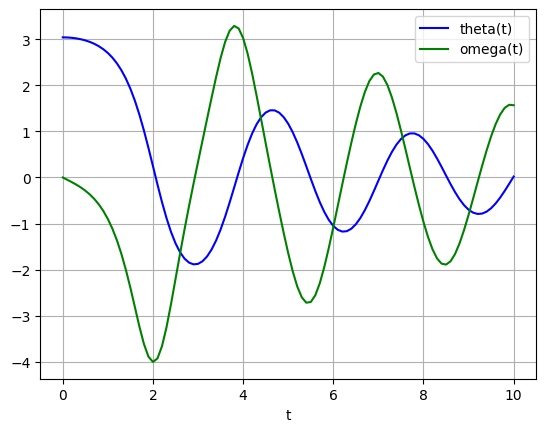

In [ ]:
##### Exemplo do uso da biblioteca SciPy para resolução de sistemas de EDOs #####

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def pendulo (y, t, b, c):
  theta, omega = y
  dydt = [omega, -b*omega - c*np.sin(theta)]
  return dydt

b = 0.25
c = 5.00

# x = t (tempo)
# y = [theta, omega] (posição e velocidade)
# Pendulo quase na vertical (pi-0.1) e em descanso
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

solucao = odeint(pendulo, y0, t, args=(b, c))

plt.plot(t, solucao[:, 0], 'b', label='theta(t)')
plt.plot(t, solucao[:, 1], 'g', label='omega(t)')
plt.legend()
plt.xlabel('t')
plt.grid()
plt.show()


---
# Exemplo de Aplicação 1
\\
Em bioprocessos nos quais é necessário sintetizar um produto e/ou produzir biomassa, deve-se acompanhar o progresso do crescimento celular, do consumo de substrato fornecido e da síntese do produto de interesse. Um dos modelos mais empregados para a simulação e acompanhamento desses processos é aquele proposto por Monod, um homólogo da equação de Michaelis-Menten, também amplamente conhecido por engenheiros de bioprocessos.

\\
De acordo com o modelo de Monod, a taxa de crescimento específica de uma cultura celular é dada por:

\\

$\mu = \frac{1}{X} \cdot \frac{dX}{dt} = \frac{\mu_{máx} \cdot S}{K_S + S}$
(Equação 1)

\\
Onde:
- $\mu$ é a taxa de crescimento específica;
- $\mu_{máx}$ é a taxa máxima de crescimento observada no cultivo, ou seja, o valor máximo de $\mu$;
- $t$ é o tempo de cultivo, dado em $h$;
- $K_S$ é a constante de saturação, no ponto em que $\mu = \mu_{máx}/2$, dada em $g/L$;
- $S$ é a concentração de substrato, em $g/L$.

\\
São, portanto, necessários três diferentes balanços de massa para avaliar as concentrações de célula, substrato e produto no meio, dependentes umas das outras e do tempo decorrido de cultivo. O modelo de Luedeking e Piret, baseado na cinética de crescimento de Monod, fornecem as relações necessárias para estes balanços.

\\
1. Balanço de massa de células:

  Taxa de crescimento atual = Concentração celular *x* (Taxa de crescimento específica - Taxa de morte celular)

  $\frac{dX}{dt} = X \cdot \mu$
  (Equação 2)

\\

2. Balanço de massa de substrato:

  Taxa de consumo de substrato = Substrato fornecido - Substrato consumido

  $\frac{dS}{dt} = \frac{Q}{V} \cdot (S_0 - S) - \frac{X \cdot \mu}{Y_{XS}}$
  (Equação 3)

  Onde:
  - $V$ é o volume atual de meio no reator, dado por $V_0 + Qt$;
  - $V_0$ é o volume inicial de preenchimento do reator;
  - $Q$ é a vazão de alimentação.
  - $S_0$ é a concentração de substrato na alimentação do reator;
  - $Y_{XS}$ é o coeficiente estequiométrico, isto é uma constante que indica o fator de conversão de substrato em biomassa, dado por $g_{células}/ g_{substrato}$.

\\

3. Balanço de massa de produto:

  Taxa de formação de produto = Produto inicial - Produto consumido ou drenado + Produto sintetizado

  $\frac{dP}{dt} = \frac{Q}{V} \cdot (P_0 - P) + X \cdot (\alpha \cdot \mu + \beta)$
  (Equação 4)

  Onde:
  - $P_0$ é a concentração de produto na alimentação do reator;
  - $\alpha$ e $\beta$ são as constantes de Luedeking e Piret, respectivamente, associada e não associada ao crescimento do microrganismo.

\\

Com base nas equações 1 a 4, é possível analisar os parâmetros descritos em um cultivo e/ou processo fermentativo.

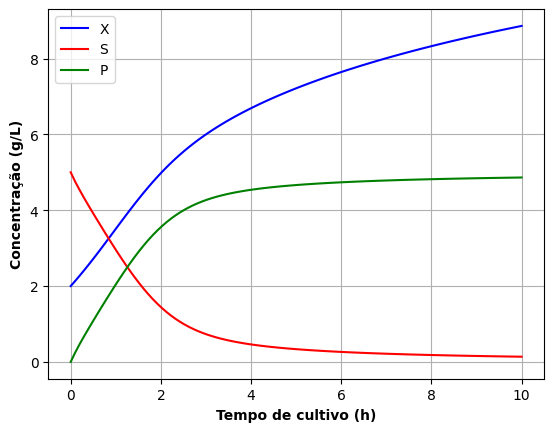

In [ ]:
########## EXEMPLO DE PROCESSO FERMENTATIVO ##########

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#--------------------------------------------------------#
#|               Definicao das constantes               |#
#--------------------------------------------------------#
mimax = 2
Ks = 10
t0 = 0
tf = 10
X0 = 2
S0 = 5
Si = 5
P0 = 0
Pi = 0
V0 = 5
Q = 10
Yxs = 0.5
alfa = 2
beta = 0

#--------------------------------------------------------#
#|                 Declaracao da Funcao                 |#
#--------------------------------------------------------#

def crescimento (Concentracoes, t):
  X, S, P = Concentracoes
  mi = mimax * S/ (Ks + S)
  V = V0 + Q * t
  dXdt = X * mi
  dSdt = (Q/V) * (Si - S) - X * mi/ Yxs
  dPdt = (Q/V) * (Pi - P) + X * (alfa * mi + beta)
  return dXdt, dSdt, dPdt

#--------------------------------------------------------#
#|                  Integracao Numerica                 |#
#--------------------------------------------------------#

iniciais = [X0, S0, P0]
t = np.linspace(t0, tf, 100)
Solucao = odeint(crescimento, iniciais, t)

#Separacao dos vetores solucao
X = Solucao[:, 0]
S = Solucao[:, 1]
P = Solucao[:, 2]

#--------------------------------------------------------#
#|                  Plotagem do Grafico                 |#
#--------------------------------------------------------#

plt.plot(t, X, "b-", label="X")
plt.plot(t, S, "r-", label="S")
plt.plot(t, P, "g-", label="P")
plt.xlabel("Tempo de cultivo (h)", weight="bold")
plt.ylabel("Concentração (g/L)", weight="bold")
plt.legend(loc="best")
plt.grid(True)
plt.show()



---
# Exemplo de Aplicação 2
\\
A adsorção linear é um método que pode ser empregado para a purificação de substâncias diversas a partir de um fluido em escoamento. É usado um adsorvente sólido poroso, através do qual o fluido passa. Somente a molécula que apresenta certa afinidado ao adsorvente se liga a ele, enquanto o resto do fluido é rejeitado no fim do sistema. Finalmente, é necessário utilizar um solvente ou solução capaz de reverter a ligação, para a recuperação da molécula de interesse.

\\
O comportamento da substância adsorvida pode ser descrita através de equações, chamadas de isotermas, dependendo da sua natureza. A isoterma linear é a mais simples e, apesar de não ser tão comum na realidade, pode ajudar na compreensão das demais isotermas.

Para descrevê-la, é preciso considerar as seguintes variáveis interdependentes:
- $c$, a concentração da molécula alvo no fluido;
- $n$, a concentração da molécula alvo no sólido adsorvente;
- $t$, o tempo decorrido de adsorção;
- $x$, a distância da coluna, isto é, a distância percorrida pelo fluido (contendo a molécula alvo) através do sólido adsorvente.

\\
Ainda, são necessárias algumas constantes no processo, determinadas pelo tipo de adsorvente, fluido, de molécula alvo ou outros parâmetros do processo:
- $k$, o coeficiente de transporte de massa;
- $\phi$, a porosidade do leito;
- $v$, a velocidade de escoamento do fluido;
- $\gamma$, um parâmetro constante da isoterma linear, definida experimentalmente.

\\
O Sistema 1, abaixo, descreve uma adsorção linear a partir das variáveis e constantes definidas anteriormente:

\\

$\begin{cases}
\phi \cdot \frac{\delta c}{\delta t'} +
\phi v \cdot \frac{\delta c}{\delta x'} +
(1 - \phi) \cdot \frac{\delta n}{\delta t'} = 0
\\
\frac{\delta n}{\delta t'} = k \cdot (\gamma c - n)
\end{cases}$
(Sistema 1)

\\

Para permitir a compreensão do sistema, é preciso considerar também as relações descritas abaixo:

\\

$\begin{cases}
x = \frac{k \cdot x'}{v}
\\
t = k \cdot t'
\end{cases}$
(Sistema 2)

\\

Ainda, é interessante analisar os sistemas como equações diferenciais ordinárias, em vez de as originais equações parciais. Com esta finalidade, será selecionada apenas uma variável independente, neste caso a distância percorrida na coluna. A outra variável, o tempo, será tratada como uma constante.

\\
Portanto, combinando os Sistemas 1 e 2 apresentados, e manipulando as equações diferenciais parciais para torná-las ordinárias, é possível obter o Sistema de equações 3, abaixo:

\\

$\begin{cases}
\frac{dc}{dt} + \frac{\Delta c}{\Delta x} +
(\gamma c - n) \cdot \frac{(1-\phi)}{\phi} = 0
\\
\frac{dn}{dt} = \gamma c - n
\end{cases}$
(Sistema 3)

\\

Pela natureza do processo de adsorção, é possível estabelecer as condições iniciais:
- Inicialmente, não há fluido na coluna, portanto não há adsorvido em nenhuma posição da coluna de leito poroso ou no fluido
  - $c_{(x', t = 0)} = 0$
  - $n_{(x', t = 0)} = 0$
- Considera-se a concentração da molécula de interesse no fluido de alimentação como uma concentração relativa de 100%
  - $c_{(x = 0, t')} = 1$

\\

Em posse das condições iniciais ou de contorno, é necessário apenas estabelecer os valores das constantes presentes na equação para permitir a sua aplicação e posterior resolução do problema.


ValueError: x and y must have same first dimension, but have shapes (10,) and (100, 20)

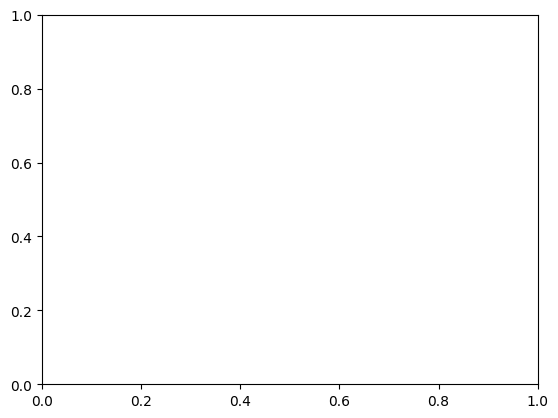

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def adsorcao(y, t):
    global N, Deltax, c0, K, gama, phi
    c = y[:N]
    n = y[N:2*N]
    dct = np.zeros(N)
    dnt = np.zeros(N)
    dct[0] = -(c[0] - c0) / Deltax - (1 - phi) / phi * (gama * c[0] - n[0])
    dnt[0] = gama * c[0] - n[0]
    for i in range(1, N):
        dct[i] = -(c[i] - c[i-1]) / Deltax - (1 - phi) / phi * (gama * c[i] - n[i])
        dnt[i] = gama * c[i] - n[i]
    dyt = np.concatenate((dct, dnt))
    return dyt

# Definição dos valores
N = 10
x0 = 0
xf = 1
Deltax = (xf - x0) / N
c0 = 1
gama = 2
phi = 0.4

# Condição inicial
c = np.zeros(N)
n = np.zeros(N)

# Condição de contorno
c0 = 1

y0 = np.concatenate((c, n))

# Tempo
t0 = 0
tf = 1
t = np.linspace(t0, tf, 100)

# Integração
y = odeint(adsorcao, y0, t)

# Gráfico
x = np.linspace(x0, xf, N)
plt.plot(x, c0 * np.ones_like(x), label='c0')
#plt.plot(x, y[:, :N].T, label='c')
#plt.plot(x, y[:, N:].T, label='n')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribuição de c e n ao longo de x')
plt.legend()
plt.show()



[[1.         0.64      ]
 [0.9878323  0.64543463]
 [0.97589207 0.6507501 ]
 [0.96417482 0.65594876]
 [0.95267632 0.66103286]
 [0.94139238 0.6660046 ]
 [0.9303189  0.67086614]
 [0.91945184 0.67561962]
 [0.90878726 0.68026711]
 [0.89832128 0.68481066]
 [0.88805009 0.68925227]
 [0.87796997 0.69359392]
 [0.86807725 0.69783753]
 [0.85836836 0.70198499]
 [0.84883976 0.70603815]
 [0.83948801 0.70999885]
 [0.83030971 0.71386887]
 [0.82130155 0.71764995]
 [0.81246027 0.72134382]
 [0.80378268 0.72495216]
 [0.79526566 0.72847661]
 [0.78690613 0.73191879]
 [0.77870107 0.7352803 ]
 [0.77064753 0.7385627 ]
 [0.76274261 0.74176751]
 [0.75498346 0.74489624]
 [0.74736726 0.74795037]
 [0.7398913  0.75093133]
 [0.73255289 0.75384055]
 [0.7253494  0.7566794 ]
 [0.71827825 0.75944924]
 [0.71133693 0.76215142]
 [0.70452293 0.76478723]
 [0.69783382 0.76735797]
 [0.69126721 0.76986489]
 [0.68482075 0.77230924]
 [0.67849216 0.77469222]
 [0.67227916 0.77701502]
 [0.66617955 0.77927881]
 [0.66019117 0.78148473]


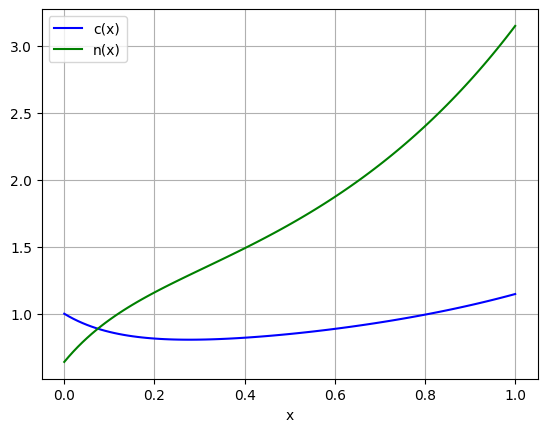

In [ ]:
########## EXEMPLO DO LIVRO DE KWONG 2016 ##########
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#--------------------------------------------------------#
#|                 Declaracao da Funcao                 |#
#--------------------------------------------------------#
#Semitítulo
# dc/dt = -dc/dx - (gamma*c-n)*((1-phi)/phi)
# dc/dx = -dc/dt - (gamma*c-n)*((1-phi)/phi)
# dc/dt = -Deltac/Deltax -(gamma*c - n)*((1-phi)/phi)
# dn/dt = gamma*c - n
# vetor: [c,n]
# condições iniciais: c(t=0)=0; n(t=0)=0

def adsorcaoTempo(Concentracoes, t):
  c, n = Concentracoes
  dcdt = -(c)/(xf - x0) -(gamma*c - n)*((1-phi)/phi)
  dndt = gamma*c - n
  return dcdt, dndt

def adsorcaoPosicao(Concentracoes, x):
  dcdt, dndt = Concentracoes
  dcdx = -(dcdt - C0)/ tf - (gamma * dcdt - dndt) * ((1 - phi)/ phi)
  dndx = (dndt - N0)/ tf - gamma * dcdx
  return dcdx, dndx

#--------------------------------------------------------#
#|               Definicao das Constantes               |#
#--------------------------------------------------------#
C0 = 1
N0 = 0.64
gamma = 2.0
phi = 0.4
Conc0 = [C0, N0]

x0 = 0
xf = 1
t0 = 0
tf = 0.4
x = np.linspace(x0,xf,100)
t = np.linspace(t0,tf,100)

#--------------------------------------------------------#
#|                 Integracao da Funcao                 |#
#--------------------------------------------------------#
Parametros = odeint(adsorcaoTempo, Conc0, t)
print(Parametros)
Solucao = odeint(adsorcaoPosicao, Parametros[0], x)

plt.plot(x, Solucao[:, 0], 'b', label='c(x)')
plt.plot(x, Solucao[:, 1], 'g', label='n(x)')
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()



In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def adsorcao(y, x):
  c = y[0:N-1]
  n = y[N:2*N-1]
  dcdt[0]=-(c[0]-c0)/Deltax-(1-phi)/phi*(gamma*c[0]-n[0])
  dndt[0]=gamma*c[0]-n[0]
  for i in range(N-2):
    dcdt[i]=-(c[i]-c[i-1])/Deltax-(1-phi)/phi*(gamma*c[i]-n[i])
    dndt[i]=gamma*c[i]-n[i]
  return dcdt, dndt

gamma = 2
phi = 0.4
x0 = 0
xf = 1
N = 100
Deltax = (xf-x0)/N
x = np.linspace(x0, xf, N)
t0 = 0
tf = 1
t = (np.linspace(t0, tf, N))

c = [0]*N
n = [0]*N
c0 = 1

y0 = [c,n]

y = odeint(adsorcao, y0, t)
c = y[0:N-1, :]
n = y[N:2*N-1,:]


plt.plot(x, c[:,41], 'b', label='c(x)')
plt.plot(x, n[:,41], 'g', label='n(x)')
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

ValueError: Initial condition y0 must be one-dimensional.